<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 8.2 MB/s 


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.5 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751265 sha256=a2bb9578b56d6564902e32e0ccd7ed13c837f2919723102aed953ec04f3495db
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-etc", interval="minute30")
df

,open,high,low,close,volume,value
2022-12-07 11:00:00,26100.0,26150.0,26080.0,26150.0,2512.063484,6.561705e+07
2022-12-07 11:15:00,26150.0,26160.0,26080.0,26080.0,4230.794642,1.105452e+08
2022-12-07 11:30:00,26080.0,26080.0,25990.0,26060.0,14700.286221,3.825921e+08
2022-12-07 11:45:00,26020.0,26060.0,25970.0,26010.0,6536.361783,1.700339e+08
2022-12-07 12:00:00,26010.0,26020.0,25990.0,26010.0,1771.320117,4.605129e+07
...,...,...,...,...,...,...
2022-12-09 11:45:00,25540.0,25560.0,25500.0,25530.0,4987.243909,1.273307e+08
2022-12-09 12:00:00,25530.0,25560.0,25490.0,25500.0,3602.778816,9.196522e+07
2022-12-09 12:15:00,25490.0,25530.0,25460.0,25500.0,7262.068365,1.850180e+08
2022-12-09 12:30:00,25490.0,25500.0,25450.0,25480.0,1389.380697,3.538529e+07


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-12-07 11:00:00,26150.0
1,2022-12-07 11:15:00,26080.0
2,2022-12-07 11:30:00,26060.0
3,2022-12-07 11:45:00,26010.0
4,2022-12-07 12:00:00,26010.0
...,...,...
195,2022-12-09 11:45:00,25530.0
196,2022-12-09 12:00:00,25500.0
197,2022-12-09 12:15:00,25500.0
198,2022-12-09 12:30:00,25480.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

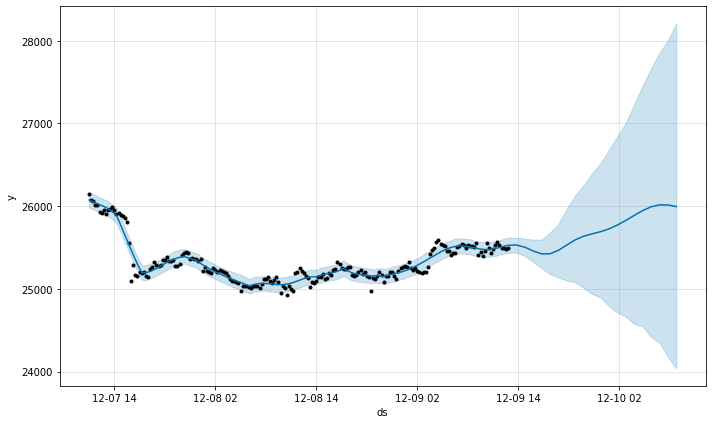

In [ ]:
#그래프1
fig1 = model.plot(forecast)

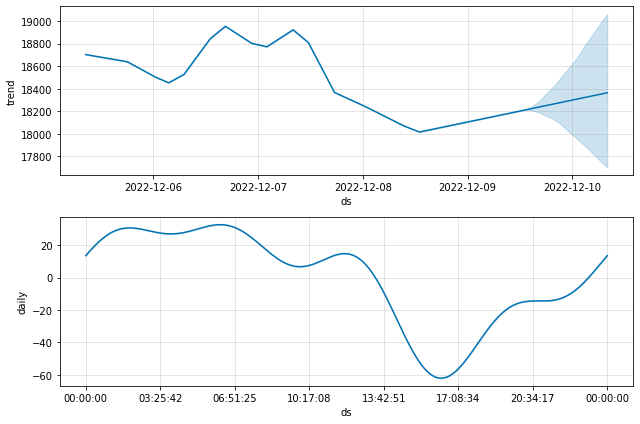

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)